# Offline Evaluation Visualizations
This notebook evaluates user-specific performance of various recommenders in the MIND validation dataset using `mind-val-user-metrics.csv.gz` from `output` folder. Each visualization shows how different recommenders compare across metrics.

## 1. Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading Data

In [2]:
mind_val_user_metrics = pd.read_csv('../outputs/mind-val-user-metrics.csv.gz')
mind_val_user_metrics.head()

,user_id,recommender,NDCG@5,NDCG@10,MRR,RBO@5,RBO@10,personalized
0,bf5bb199-a039-5d82-812b-a7f69df5788a,nrms,1.00000,1.00000,0.500000,0.409510,0.651322,True
1,bf5bb199-a039-5d82-812b-a7f69df5788a,mmr,0.63093,0.63093,0.333333,0.337510,0.501731,True
2,bf5bb199-a039-5d82-812b-a7f69df5788a,pfar,1.00000,1.00000,0.500000,0.409510,0.651322,True
3,bf5bb199-a039-5d82-812b-a7f69df5788a,topic-cali,1.00000,1.00000,0.500000,0.409510,0.651322,True
4,bf5bb199-a039-5d82-812b-a7f69df5788a,softmax,1.00000,1.00000,1.000000,0.232938,0.435088,True


## 3. Visualizations
Each bar plot represents a specific metric, with recommenders plotted on the x-axis and metric values on the y-axis. The metrics range from 0 to 1 with higher values indicationg better performance in assessing recommender effectiveness. Error bars indicate variability of the mean values and represent a 95% bootstrapped confidence interval.

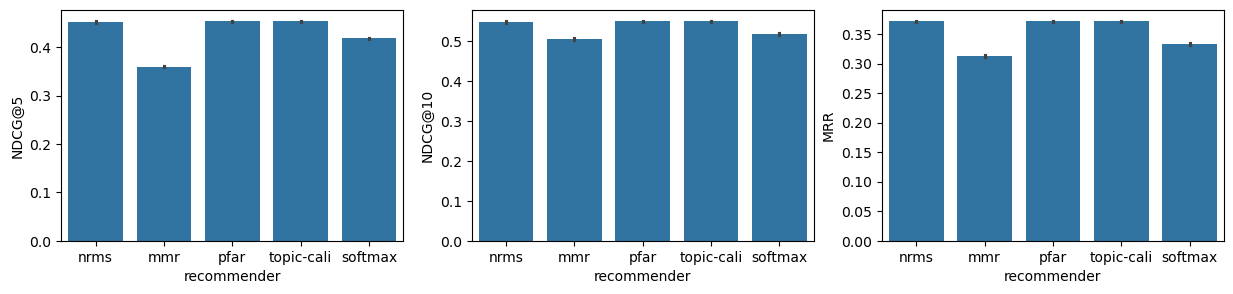

In [3]:
plt.figure(figsize=(15, 3))

plt.subplot(1, 3, 1)
sns.barplot(data=mind_val_user_metrics, x='recommender', y='NDCG@5')

plt.subplot(1, 3, 2)
sns.barplot(data=mind_val_user_metrics, x='recommender', y='NDCG@10')

plt.subplot(1, 3, 3)
sns.barplot(data=mind_val_user_metrics, x='recommender', y='MRR')

plt.show()

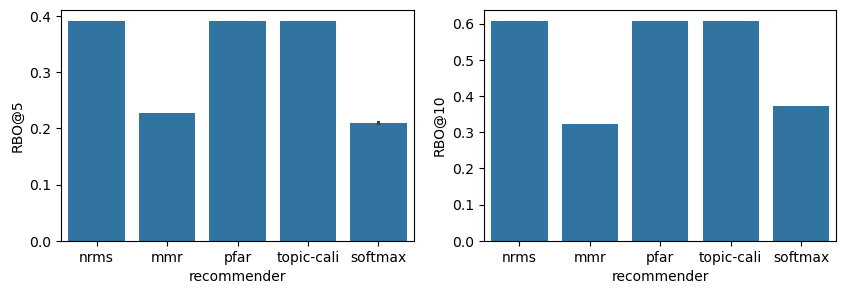

In [4]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
sns.barplot(data=mind_val_user_metrics, x='recommender', y='RBO@5')

plt.subplot(1, 2, 2)
sns.barplot(data=mind_val_user_metrics, x='recommender', y='RBO@10')

plt.show()